ACTIVIDAD SESIÓN CORRELACIÓN
En esta actividad, generarás y analizarás datos simulados para explorar la relación entre dos
variables utilizando herramientas estadísticas y visualización en Python.
REQUERIMIENTOS:
1. Creación de Datos Simulados (2 puntos)
• Generar dos listas de datos numéricos simulados que representen variables
relacionadas (ejemplo: horas de ejercicio por semana y presión arterial).
2. Construcción de una Tabla de Contingencia (2 puntos)
• Crear una tabla de contingencia con datos categóricos (ejemplo: grupo de edad y tipo de
dieta).
3. Visualización con Scatterplot (2 puntos)
• Crear un gráfico de dispersión (scatterplot) para analizar la relación entre dos variables
numéricas.
4. Cálculo del Coeficiente de Correlación de Pearson (2 puntos)
• Calcular el coeficiente de correlación de Pearson e interpretar su resultado.
5. Reflexión sobre Correlación vs. Causalidad (2 puntos)
• Explicar con ejemplos si la correlación encontrada implica causalidad o no.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dowhy import CausalModel
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)





In [2]:
np.random.seed(42)
n=100

# Medias
media_peso = 70
media_ejercicio = 3
media_edad = 40

# Desviaciones estándar
std_peso = 10
std_ejercicio = 1.5
std_edad = 10

# Correlaciones deseadas
corr_peso_ejercicio = -0.7
corr_peso_edad = 0.6
corr_ejercicio_edad = -0.5

# Matriz de covarianza 3x3
cov = [
    [std_peso**2, corr_peso_ejercicio * std_peso * std_ejercicio, corr_peso_edad * std_peso * std_edad],
    [corr_peso_ejercicio * std_peso * std_ejercicio, std_ejercicio**2, corr_ejercicio_edad * std_ejercicio * std_edad],
    [corr_peso_edad * std_peso * std_edad, corr_ejercicio_edad * std_ejercicio * std_edad, std_edad**2]
]

# Vector de medias
media = [media_peso, media_ejercicio, media_edad]

# Generar datos multivariados
datos = np.random.multivariate_normal(media, cov, size=n)

# Extraer listas
Peso = np.round(datos[:, 0],2).tolist()
hEjercicio = np.round(datos[:, 1],2).tolist()
Edad = datos[:, 2].astype(int).tolist()



#Edad = np.random.normal(loc=30, scale=5, size =n).clip(15,90).astype(int)
GrupoEtareo = pd.cut(Edad,
                     bins=[15, 25, 35, 45, 55, 65,75, 85, 95],
                     labels=['15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94'],
                     right=False)
TipoDieta = np.random.choice(['Vegetariano', 'Vegano', 'No Vegetariano'], size=n)

df_salud = pd.DataFrame({
    'Horas Ejercicio': hEjercicio,
    'Peso': Peso,
    'Edad': Edad,
    'Grupo Etareo': GrupoEtareo,
    'Tipo Dieta': TipoDieta
})


df_salud.head()


,Horas Ejercicio,Peso,Edad,Grupo Etareo,Tipo Dieta
0,2.87,64.87,36,35-44,Vegetariano
1,4.87,55.34,27,25-34,Vegano
2,4.83,59.31,22,15-24,Vegetariano
3,4.20,63.13,37,35-44,Vegetariano
4,5.71,59.50,46,45-54,No Vegetariano


In [3]:
tabla_contingencia = pd.crosstab(df_salud['Grupo Etareo'], df_salud['Tipo Dieta'])
print("\n\033[4mTabla de contingencia:\033[0m")
print(tabla_contingencia)


vCuantitativas = ['Horas Ejercicio', 'Peso']
media = {}
mediana = {}
moda = {}
rango = {}
varianza = {}
desviacion_estandar = {}
df = df_salud

for columna in vCuantitativas:
  media[columna] = df[columna].mean()
  mediana[columna]  = df[columna].median()
  moda[columna]  = df[columna].mode()[0]
  rango[columna] = df[columna].max() - df[columna].min()
  varianza[columna] = df[columna].var()
  desviacion_estandar[columna] = df[columna].std()
  coeficiente_variacion = (desviacion_estandar[columna] / media[columna])*100

  print("\n\033[4mValores Variable Cuantitativa",columna.capitalize(),":\033[0m")
  print("Media:",f"{media[columna]: .2f}")
  print("Mediana:",f"{mediana[columna]: .2f}")
  print("Moda:",moda[columna])
  print("Rango:",rango[columna])
  print("Varianza:",f"{varianza[columna]: .2f}")
  print("Desviacion Estandar:",f"{desviacion_estandar[columna]: .2f}")
  print("Coeficiente de variacion: ", f"{coeficiente_variacion: .2f}%")




Tabla de contingencia:
Tipo Dieta    No Vegetariano  Vegano  Vegetariano
Grupo Etareo                                     
15-24                      1       2            1
25-34                      6       8            9
35-44                     14       9           19
45-54                     10       5           12
55-64                      2       1            1

Valores Variable Cuantitativa Horas ejercicio :
Media:  3.08
Mediana:  2.98
Moda: 3.89
Rango: 8.01
Varianza:  2.35
Desviacion Estandar:  1.53
Coeficiente de variacion:   49.78%

Valores Variable Cuantitativa Peso :
Media:  68.36
Mediana:  69.33
Moda: 69.84
Rango: 36.67
Varianza:  76.59
Desviacion Estandar:  8.75
Coeficiente de variacion:   12.80%


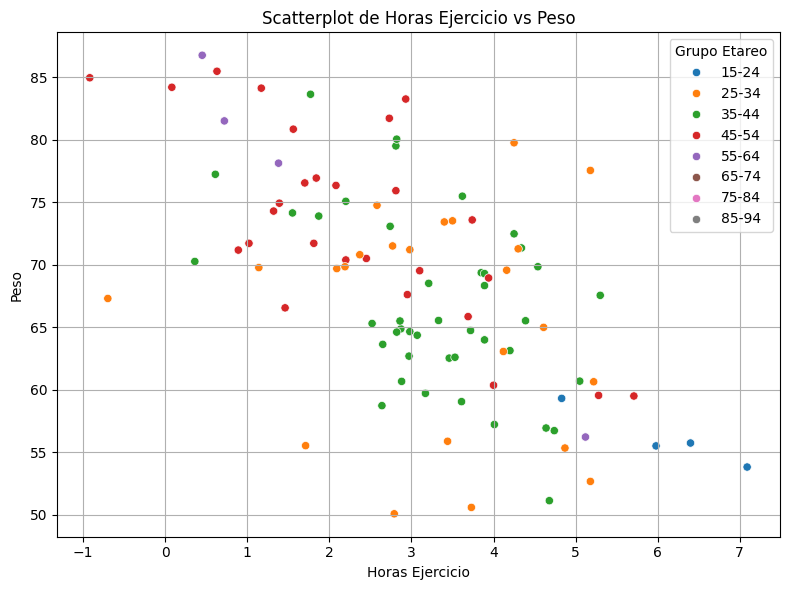

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_salud, x='Horas Ejercicio', y='Peso', hue='Grupo Etareo')
plt.xlabel('Horas Ejercicio')
plt.ylabel('Peso')
plt.title('Scatterplot de Horas Ejercicio vs Peso')
plt.tight_layout()
plt.grid(True)

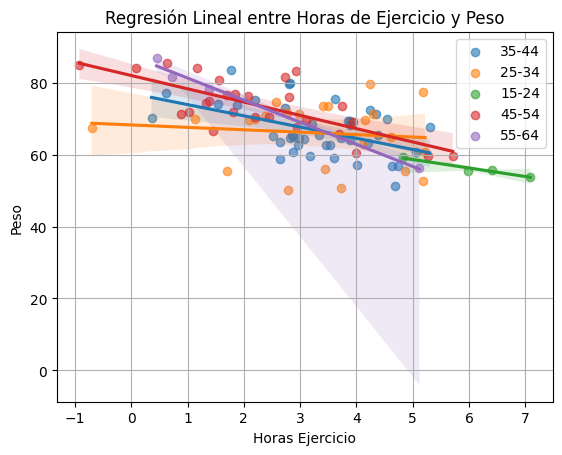

In [5]:
for gEtareo in df_salud['Grupo Etareo'].unique():
    subset = df_salud[df_salud['Grupo Etareo'] == gEtareo]
    sns.regplot(x='Horas Ejercicio', y='Peso', data=subset, label=gEtareo, scatter_kws={'alpha': 0.6})

plt.xlabel('Horas Ejercicio')
plt.ylabel('Peso')
plt.title('Regresión Lineal entre Horas de Ejercicio y Peso')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
correlacion = df_salud['Horas Ejercicio'].corr(df_salud['Peso'])
print(f"\nCoeficiente de correlación de Pearson entre Horas Ejercicio y Peso: {correlacion:.3f}")


Coeficiente de correlación de Pearson entre Horas Ejercicio y Peso: -0.613


Según el coeficiente de correlacion de Pearson, el valor nos dice que hay una Correlación moderada negativa, esto es, las variables son inversamente proporcionales.
Según el gráfico, en la Regresión Lineal podemos observar que en todos los grupos etáreos la variable Peso disminuye a mayor valor de la variable Horas de Ejercicio, por lo tanto podemos inferir Causalidad: A mayor numero de horas de Ejercicio, menor Peso.


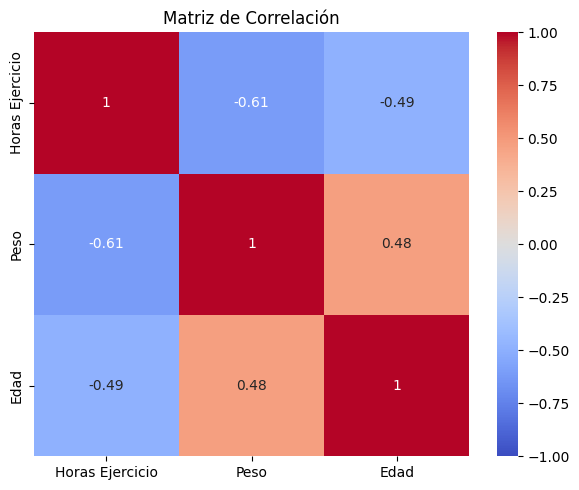

In [7]:
matriz_corr = df_salud.select_dtypes(include=['number']).corr()
plt.figure(figsize=(6, 5))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', vmin=-1 , vmax=1)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()